<a href="https://colab.research.google.com/github/j-m-d-h/DS-Unit-1-Build/blob/master/Jordan_Heuer_DS_Unit_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving FanGraphs Leaderboard.csv to FanGraphs Leaderboard.csv


In [0]:
df1 = pd.read_csv('FanGraphs Leaderboard.csv')

df1.head(10)

,Season,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,H,HR,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%
0,2010,1.18,18.2 %,44.3 %,37.5 %,9.3 %,9.4 %,42554,4613,39.2 %,35.8 %,25.0 %,18.1 %,51.8 %,30.1 %
1,2011,1.24,19.6 %,44.4 %,36.0 %,10.6 %,9.7 %,42267,4552,39.8 %,35.4 %,24.8 %,24.3 %,51.5 %,24.3 %
2,2012,1.33,20.9 %,45.1 %,34.0 %,10.0 %,11.3 %,42063,4934,39.4 %,35.4 %,25.3 %,15.7 %,55.9 %,28.5 %
3,2013,1.30,21.2 %,44.5 %,34.3 %,9.7 %,10.5 %,42093,4661,38.8 %,36.1 %,25.1 %,16.5 %,53.6 %,29.9 %
4,2014,1.30,20.8 %,44.8 %,34.4 %,9.6 %,9.5 %,41595,4186,40.2 %,34.2 %,25.6 %,18.3 %,52.6 %,29.1 %
5,2015,1.34,20.9 %,45.3 %,33.8 %,9.5 %,11.4 %,42106,4909,39.1 %,35.2 %,25.7 %,18.6 %,52.5 %,28.8 %
6,2016,1.29,20.7 %,44.7 %,34.6 %,9.7 %,12.8 %,42276,5610,39.7 %,34.7 %,25.6 %,18.8 %,49.9 %,31.4 %
7,2017,1.24,20.3 %,44.2 %,35.5 %,9.6 %,13.7 %,42215,6105,39.8 %,34.9 %,25.3 %,18.9 %,49.3 %,31.8 %
8,2018,1.22,21.5 %,43.2 %,35.4 %,10.3 %,12.7 %,41018,5585,40.3 %,34.5 %,25.1 %,18.1 %,46.7 %,35.3 %
9,2019,1.20,21.4 %,42.9 %,35.7 %,9.8 %,15.3 %,42040,6776,40.7 %,34.2 %,25.1 %,17.0 %,45.0 %,38.0 %


In [0]:
df1['FB%'].replace(regex=True,inplace=True,to_replace=' %',value='')
df1['FB%'] = df1['FB%'].astype(str).astype(float)

df1['Hard%'].replace(regex=True,inplace=True,to_replace=' %',value='')
df1['Hard%'] = df1['Hard%'].astype(str).astype(float)

df1['HR/FB'].replace(regex=True,inplace=True,to_replace=' %',value='')
df1['HR/FB'] = df1['HR/FB'].astype(str).astype(float)

In [0]:
df1.replace(regex=True,inplace=True,to_replace=' %',value='')

df1 = df1.astype(float)

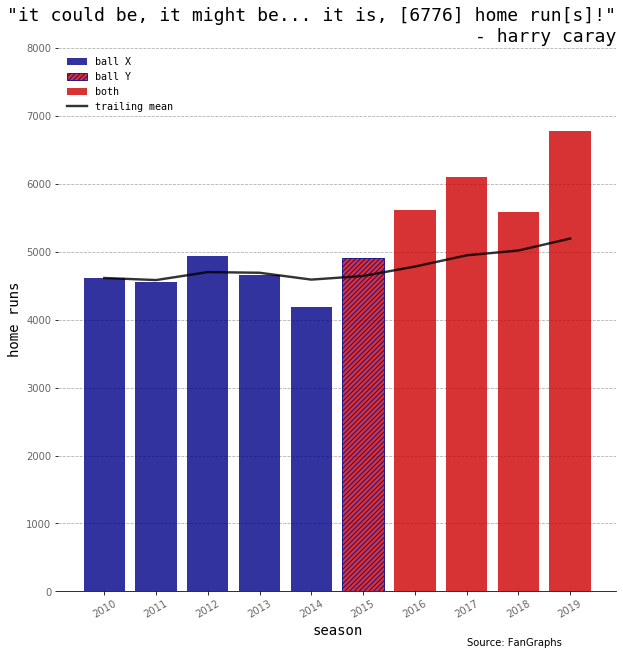

In [0]:
# Used MLB colors for the graph.


import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

bargroup1 = df1.Season <= 2014
bargroup2 = df1.Season == 2015
bargroup3 = df1.Season >= 2016

p1 = plt.bar(df1.Season[bargroup1], df1.HR[bargroup1], color = '#000089', alpha=.8, zorder=3)
p2 = plt.bar(df1.Season[bargroup2], df1.HR[bargroup2], color = '#CD0001', edgecolor='#000089', hatch="/////", alpha=.8, zorder=3)
p3 = plt.bar([2016,2017,2018,2019], [5610,6105,5585,6776], color = '#CD0001', alpha=.8, zorder=3)

p4 = plt.plot(df1.Season, df1['HR'].rolling(window=10, min_periods=1).mean(), zorder=4, color='k', linewidth=2.4, alpha=.8)

plt.grid(b=True, axis='y', zorder=0, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.legend((p1[0], p2[0], p3[0], p4[0]), ('ball X', 'ball Y', 'both', 'trailing mean'), prop={'family': 'monospace'}, loc='upper left', frameon=False)
plt.title('"it could be, it might be... it is, [6776] home run[s]!"\n- harry caray', loc='right', fontfamily='monospace', fontsize=18)
plt.text(s='Source: FanGraphs', x=2017, y=-800)

plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], rotation=30, alpha=.6)
plt.xlabel('season', fontfamily='monospace', fontsize=14)
plt.ylabel('home runs', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
plt.ylim(0,8000)

plt.show()

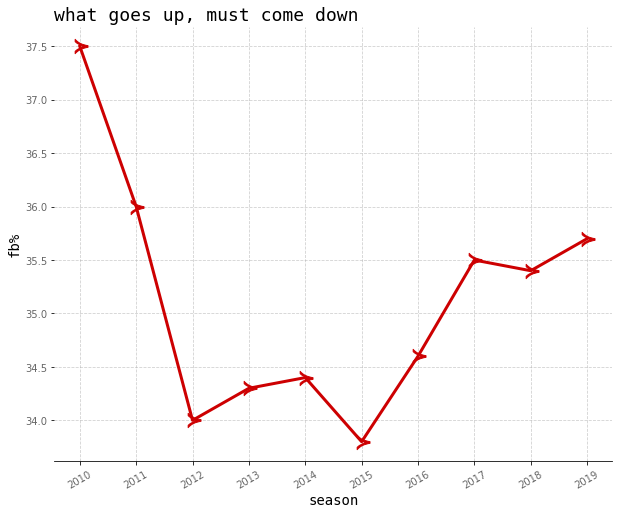

In [0]:
# Trying to make the graph look like baseball stitches. Not working out super well.


plt.figure(figsize=(10,8))

plt.plot(df1['Season'], df1['FB%'], marker='$\succ$', color="#CD0001", markersize=15, linewidth=3)

plt.grid(b=True, axis='both', zorder=0, linestyle='--', alpha=.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], rotation=30, alpha=.6)
plt.xlabel('season', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
plt.ylabel('fb%', fontfamily='monospace', fontsize=14)

plt.title('what goes up, must come down', fontsize=18, fontfamily='monospace', loc='left')
plt.show()

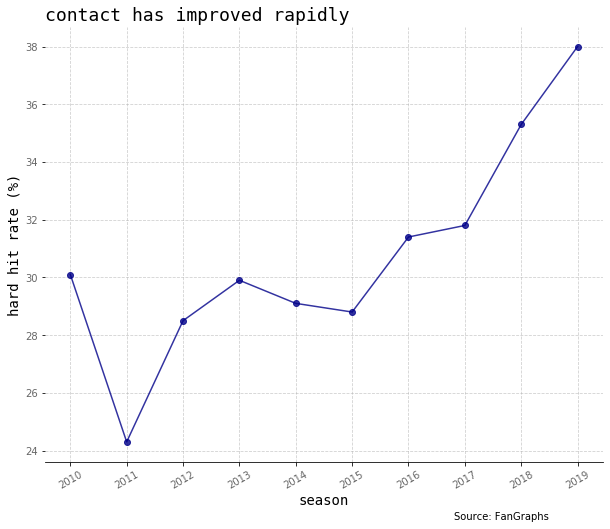

In [0]:
plt.figure(figsize=(10,8))

plt.plot(df1['Season'], df1['Hard%'], marker='o', color='#000089', alpha=.8)

plt.grid(b=True, axis='both', zorder=0, linestyle='--', alpha=.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], rotation=30, alpha=.6)
plt.xlabel('season', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
plt.ylabel('hard hit rate (%)', fontfamily='monospace', fontsize=14)

plt.text(s='Source: FanGraphs', x=2016.8, y=21.6)
#plt.axvline(2014.5, color='#CD0001', dashes=(4,3))
plt.title('contact has improved rapidly', fontfamily='monospace', fontsize=18, loc='left')
plt.show()

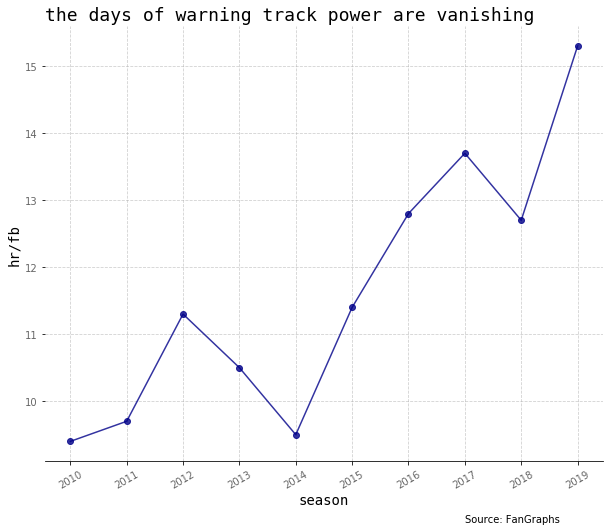

In [0]:
plt.figure(figsize=(10,8))

plt.plot(df1['Season'], df1['HR/FB'], marker='o', color='#000089', alpha=.8)

#plt.axvline(2014.5, color='#CD0001', dashes=(4,3))
plt.grid(b=True, axis='both', zorder=0, linestyle='--', alpha=.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xticks([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019], rotation=30, alpha=.6)
plt.xlabel('season', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
plt.ylabel('hr/fb', fontfamily='monospace', fontsize=14)

plt.title('the days of warning track power are vanishing', fontfamily='monospace', loc='left', fontsize=18)
plt.text(s='Source: FanGraphs', x=2017, y=8.2)

plt.show()

In [0]:
import numpy as np

print('Average HR/FB rate 2010-2014:',np.mean(df1['HR/FB'][0:5]))
print('Average HR/FB rate 2015-2019:',np.mean(df1['HR/FB'][5:10]))

Average HR/FB rate 2010-2014: 10.080000000000002
Average HR/FB rate 2015-2019: 13.180000000000001


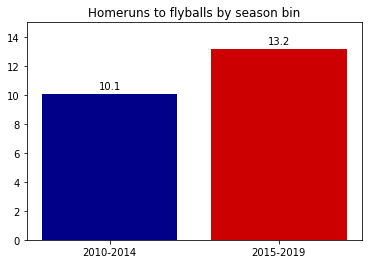

In [0]:
seasongroup = ['2010-2014','2015-2019']

fig, ax = plt.subplots()

g1 = ax.bar(seasongroup[0], np.mean(df1['HR/FB'][0:5]), color='#000089')
g2 = ax.bar(seasongroup[1], np.mean(df1['HR/FB'][5:10]), color='#CD0001')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(g1)
autolabel(g2)

ax.set_ylim(0,15)

ax.set_title('Home runs to flyballs by season bin')
plt.show()

In [0]:
np.cov(df1['FB%'], df1['Hard%'])

array([[ 1.27288889,  0.58844444],
       [ 0.58844444, 14.34622222]])

In [0]:
uploaded = files.upload()

Saving Barrels by season - Sheet1.csv to Barrels by season - Sheet1.csv


In [0]:
df2 = pd.read_csv('Barrels by season - Sheet1.csv')
df2.head()

,Rk.,Year,Results,Avg Distance (ft.)
0,1,2017,7734,392
1,2,2015,6788,390
2,3,2019,9193,390
3,4,2016,7805,390
4,5,2018,8368,386


In [0]:
xs, ys = zip(*sorted(zip(df2.Year, df2.Results)))

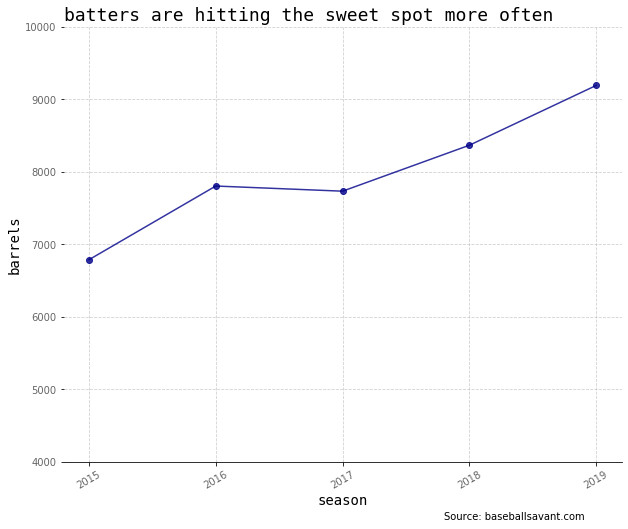

In [0]:
plt.figure(figsize=(10,8))

plt.plot(xs, ys, marker='o', color='#000089', alpha=.8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.grid(b=True, axis='both', zorder=0, linestyle='--', alpha=.6)

plt.xticks([2015,2016,2017,2018,2019], rotation=30, alpha=.6)
plt.xlabel('season', fontfamily='monospace', fontsize=14)
plt.ylabel('barrels', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
plt.ylim(4000,10000)

plt.title('batters are hitting the sweet spot more often', 
          loc='left', fontfamily='monospace', fontsize=18)
plt.text(s='Source: baseballsavant.com', x=2017.8, y=3200)

plt.show()

In [0]:
uploaded = files.upload()

Saving AAA HRs by season.csv to AAA HRs by season.csv


In [0]:
df3 = pd.read_csv('AAA HRs by season.csv')

df3 = df3.sort_values(by='Year').reset_index(drop=True)

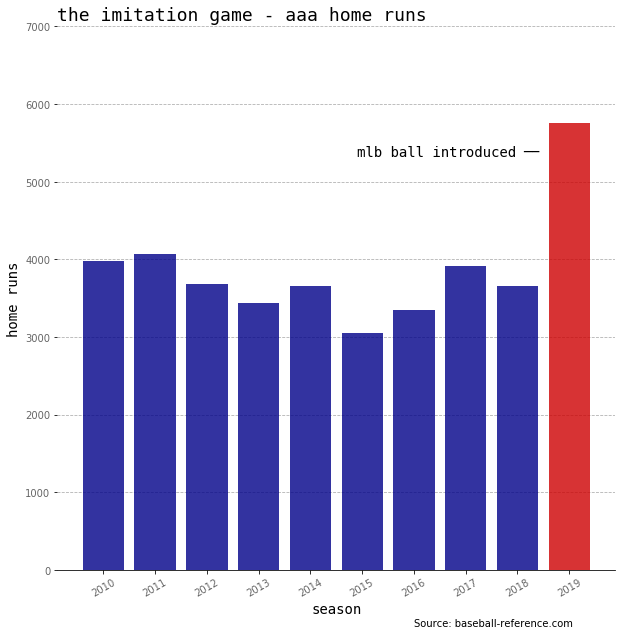

In [0]:
plt.figure(figsize=(10,10))

bargroup1 = df3.Year <= 2018
bargroup2 = df3.Year >= 2019

plt.bar(df3.Year[bargroup1], df3.Result[bargroup1], color = '#000089', alpha=.8, zorder=3)
plt.bar(df3.Year[bargroup2], df3.Result[bargroup2], color = '#CD0001', alpha=.8, zorder=3)
plt.text(y=5325,x=2014.9,s='mlb ball introduced', fontfamily='monospace', fontsize=14)
plt.text(y=5450,x=2018.1,s='__', fontsize=16)

plt.xticks(df3.Year, rotation=30, alpha=.6)
plt.xlabel('season', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
plt.ylabel('home runs', fontfamily='monospace', fontsize=14)

plt.grid(b=True, axis='y', linestyle='--', zorder=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.ylim(0,7000)

plt.title('the imitation game - aaa home runs', fontfamily='monospace', fontsize=18, loc='left')
plt.text(s='Source: baseball-reference.com', x=2016, y=-720)
plt.show()

In [0]:
np.mean(df3.Result[1:6])

3524.0

2014-2018: 3524 HR/yr

5752 - 3524 = 2228

2228 / 3524 = 63.2% increase

In [0]:
uploaded = files.upload()

Saving 2015 Barrels (Pre ASG).csv to 2015 Barrels (Pre ASG).csv


In [0]:
df4 = pd.read_csv('2015 Barrels (Pre ASG).csv')

df4.head()

,Rk.,Player,Results,Year,Month,Day
0,1,Nelson Cruz,483,2015,4,29
1,2,Josh Donaldson,481,2015,4,23
2,3,Giancarlo Stanton,479,2015,6,23
3,4,Giancarlo Stanton,478,2015,6,5
4,5,Giancarlo Stanton,478,2015,5,16


In [0]:
df4.describe()

,Rk.,Results,Year,Month,Day
count,3207.000000,3207.000000,3207.0,3207.000000,3207.000000
mean,1604.000000,392.429373,2015.0,5.289367,15.199875
std,925.925483,32.752973,0.0,0.984830,8.585355
min,1.000000,199.000000,2015.0,4.000000,1.000000
25%,802.500000,377.000000,2015.0,4.000000,8.000000
50%,1604.000000,394.000000,2015.0,5.000000,14.000000
75%,2405.500000,413.000000,2015.0,6.000000,23.000000
max,3207.000000,483.000000,2015.0,7.000000,31.000000


In [0]:
uploaded = files.upload()

Saving 2015 Barrels (Post ASG).csv to 2015 Barrels (Post ASG).csv


In [0]:
df5 = pd.read_csv('2015 Barrels (Post ASG).csv')

df5.head()

,Rk.,Player,Results,Year,Month,Day
0,1,Kris Bryant,495,2015,9,6
1,2,Michael A. Taylor,493,2015,8,20
2,3,Jonathan Schoop,484,2015,8,26
3,4,Pedro Alvarez,479,2015,10,4
4,5,Ian Desmond,477,2015,8,15


In [0]:
df5.describe()

,Rk.,Results,Year,Month,Day
count,3581.000000,3581.000000,3581.0,3581.000000,3581.000000
mean,1791.000000,388.379224,2015.0,8.308294,16.625803
std,1033.889984,33.599261,0.0,0.803561,9.131451
min,1.000000,223.000000,2015.0,7.000000,1.000000
25%,896.000000,373.000000,2015.0,8.000000,8.000000
50%,1791.000000,391.000000,2015.0,8.000000,18.000000
75%,2686.000000,409.000000,2015.0,9.000000,25.000000
max,3581.000000,495.000000,2015.0,10.000000,31.000000


In [0]:
df4_numbers = df4.describe()

df4_numbers = df4_numbers.drop(['count', 'std'])

df5_numbers = df5.describe()

df5_numbers = df5_numbers.drop(['count', 'std'])

In [0]:
import numpy as np

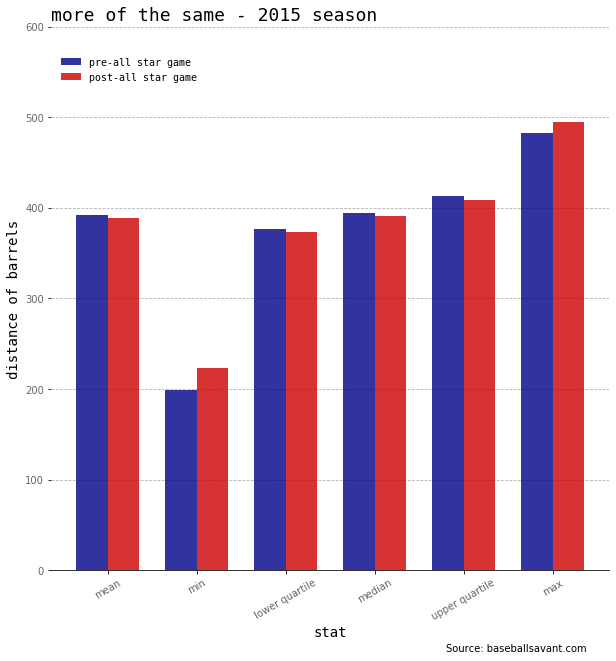

In [0]:
labels = ['mean', 'min', 'lower quartile', 'median', 'upper quartile', 'max']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, df4_numbers['Results'], width, label='pre-all star game', color='#000089', alpha=.8, zorder=3)
rects2 = ax.bar(x + width/2, df5_numbers['Results'], width, label='post-all star game', color='#CD0001', alpha=.8, zorder=3)

ax.text(s='Source: baseballsavant.com', x=3.8, y=-90)
ax.grid(b=True, axis='y', zorder=0, linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylabel('distance of barrels', fontfamily='monospace', fontsize=14)
plt.yticks(alpha=.6)
ax.set_title("more of the same - 2015 season", fontfamily='monospace', fontsize=18, loc='left')
ax.set_xticks(x)
plt.xticks(rotation=30, alpha=.6)
ax.set_xlabel('stat', fontfamily='monospace', fontsize=14)
ax.set_xticklabels(labels)
ax.legend(prop={'family': 'monospace'}, loc=(0.01,.89), frameon=False)
ax.set_ylim(0,600);